# Unsupervised learning with Principal Component Analysis (PCA)
### Dataset 2: [Wine.txt](input/Wine.txt)

### Description of the technique
PCA is a classical method used for dimensionality reduction. It is used to find the best linear projection in a smaller space. The best projection preserves as much variance as possible.

### Objective
Find and plot the PCA projection in two dimensions, using a different color
for each class.

## Index
<nav>

* [Import modules](#1)
* [Loading dataset](#2)
* [Standardize the data](#3)
* [PCA Projection to 2D](#4)
* [Explained Variance](#5)
* [Visualize 2D Projection](#6)
* [References](#7)
</nav>

<a id="1"></a>
## Import modules

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<a id="2"></a>
## Loading dataset

In [5]:
# Load training data
filename = 'input/Wine.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

<a id="3"></a>
## Standardize the data

In [6]:
features = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
target = ['Customer_Segment']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target (class)
y = df.loc[:, target].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

<a id="4"></a>
## PCA Projection to 2D

The original data has 13 columns. In this section, the code projects the original data which is 13 dimensional into 2 dimensions. After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [8]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])


print("original shape:   ", x.shape)
print("transformed shape:", principal_components.shape)

print(principal_df)

final_df = pd.concat([principal_df, df[['Customer_Segment']]], axis = 1)

print(final_df)

original shape:    (178, 13)
transformed shape: (178, 2)
     principal component 1  principal component 2
0                 3.316751              -1.443463
1                 2.209465               0.333393
2                 2.516740              -1.031151
3                 3.757066              -2.756372
4                 1.008908              -0.869831
..                     ...                    ...
173              -3.370524              -2.216289
174              -2.601956              -1.757229
175              -2.677839              -2.760899
176              -2.387017              -2.297347
177              -3.208758              -2.768920

[178 rows x 2 columns]
     principal component 1  principal component 2  Customer_Segment
0                 3.316751              -1.443463                 1
1                 2.209465               0.333393                 1
2                 2.516740              -1.031151                 1
3                 3.757066              -2.7563

<a id="5"></a>
## Explained Variance

In [9]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.73243698 2.51108093]
[0.36198848 0.1920749 ]


<a id="6"></a>
## Visualize 2D Projection

[1, 2, 3]


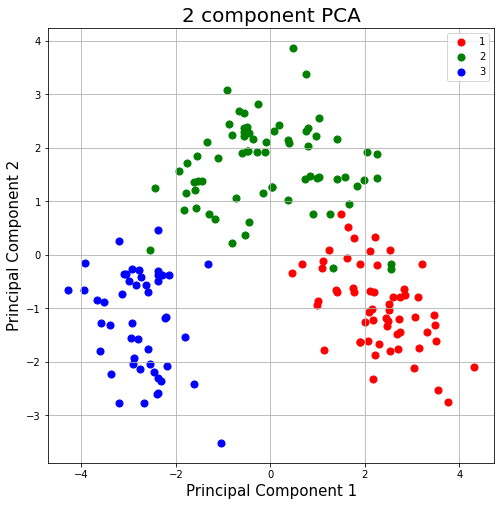

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = sorted(df['Customer_Segment'].unique())
print(targets)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Customer_Segment'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<a id="7"></a>
## References

Principal Component Analysis:

- [PCA using Python (scikit-learn)
](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
- [Principal Component Analysis (PCA) in Python](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python)
- [PCA con Python](https://www.cienciadedatos.net/documentos/py19-pca-python.html)
- [Python para todos: Tutorial de PCA en 5 sencillos pasos](https://empresas.blogthinkbig.com/python-para-todos-tutorial-de-pca-en-5/)
- [PCA Visualization in Python](https://plotly.com/python/pca-visualization/)

Feature Scaling:

- [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)